#MICROPROYECTO 4 árboles de decisión y clasificación Bayesiana. TEMA FERTILIDAD
INTEGRANTES:

Juan José Hurtado Álvarez 

Santiago Campos Giraldo

Juan José Álvarez Villada

 


##Importar librerias y cargar los datos de entrada

In [ ]:
# Imports necesarios
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from IPython.display import Image as PImage
from subprocess import check_call
from PIL import Image, ImageDraw, ImageFont
import io

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Fertilidad.csv to Fertilidad.csv


In [ ]:
df = pd.read_csv(io.BytesIO(uploaded["Fertilidad.csv"]))

Luego de leer el Dataset observamos la cantidad de Filas y Columnas

In [ ]:
df.shape

(100, 10)

Como podemos ver el dataset es relativamente pequeño

In [ ]:
df.head(10)

,Temporada en la que se realizó el análisis,Edad,Enfermedades infantiles,Accidente o trauma grave,Intervención quirúrgica,Fiebres altas en el último año,Frecuencia de consumo de alcohol,Hábito de fumar,Número de horas que pasa sentado al día,diagnóstico
0,-0.33,0.69,0,1,1,0,0.8,0,0.88,normal
1,-0.33,0.94,1,0,1,0,0.8,1,0.31,alterado
2,-0.33,0.50,1,0,0,0,1.0,-1,0.50,normal
3,-0.33,0.75,0,1,1,0,1.0,-1,0.38,normal
4,-0.33,0.67,1,1,0,0,0.8,-1,0.50,alterado
5,-0.33,0.67,1,0,1,0,0.8,0,0.50,normal
6,-0.33,0.67,0,0,0,-1,0.8,-1,0.44,normal
7,-0.33,1.00,1,1,1,0,0.6,-1,0.38,normal
8,1.00,0.64,0,0,1,0,0.8,-1,0.25,normal
9,1.00,0.61,1,0,0,0,1.0,-1,0.25,normal


El primer Pre-procesamiento que se intenta hacer es mirar si hay nulos, para posteriormente observar que se hace con ellos

In [ ]:
df.isnull().values.any()

False

Pero se ve que tenemos nigún valor Null

##¿Cuántos tienen diágnostico alterado?

In [ ]:
df.groupby('diagnóstico').size()

diagnóstico
alterado    12
normal      88
dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


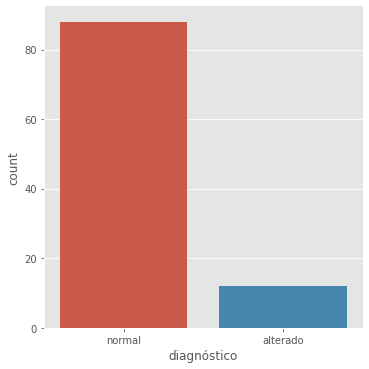

In [ ]:
sb.factorplot('diagnóstico',data=df,kind="count")

##Mapeo de atributos

Realizaremos un mapeo de los atributos de entrada para poder transformarlos a categorias que podamos utilzar en nuestro árbol de decisión

In [ ]:
df['diagnóstico'] = df['diagnóstico'].map( {
    'normal': 0, 
    'alterado': 1,    
     } ).astype(int)



En la celda anterior, convertimos la VARIABLE RESPUESTA en categorías numéricas 0 equivale a un diasnóstico normal, 1 corresponde a un diagnóstico alterado

In [ ]:
df['Temporada en la que se realizó el análisis'] = df['Temporada en la que se realizó el análisis'].map( {
    -1: 0, 
    -0.33: 1,
    0.33: 2,  
    1: 3,      
     } ).astype(int)



Aunque la temporada ya estaba en variables numéricas, acomodamos los datos para encontrar unas categorías mucho más cómodas. 

0 --> invierno 

1--> primavera

2--> verano 

3--> otoño

In [ ]:
# edad 
df_edad = df['Edad']

df.loc[ df_edad <= 0.2, 'edad'] = 0
df.loc[(df_edad > 0.2) & (df_edad <= 0.4), 'edad'] = 1
df.loc[(df_edad > 0.4) & (df_edad <= 0.6), 'edad'] = 2
df.loc[(df_edad > 0.6) & (df_edad <= 0.8), 'edad'] = 3
df.loc[ df_edad > 0.8, 'edad'] = 4

del df['Edad']

En el dataframe original la edad fue dada en un rango con una variable continua, en la celda anterior encontramos 5 categorías para que la creación del árbol sea más sencilla

0 --> desde 18 años y 21,6 años

1--> desde 21,6 años y 25,2 años

2--> 28,8

3--> 32,4

4--> 36

In [ ]:
df = pd.concat([df['edad'],df.drop('edad',axis=1)], axis=1)

In [ ]:
df['Fiebres altas en el último año'] = df['Fiebres altas en el último año'].map( {
    -1: 0, 
    0: 1,
    1: 2,
        
     } ).astype(int)

In [ ]:
df['Hábito de fumar'] = df['Hábito de fumar'].map( {
    -1: 0, 
    0: 1,
    1: 2,
        
     } ).astype(int)

In [ ]:
df['Frecuencia de consumo de alcohol'].unique()

array([0.8, 1. , 0.6, 0.2, 0.4])

In [ ]:
df['Frecuencia de consumo de alcohol'] = df['Frecuencia de consumo de alcohol'].map( {
    0.2: 0, 
    0.4: 1,
    0.6: 2,
    0.8: 3,
    1:4,        
     } ).astype(int)


Las variables anteriores ya estaban en variables numéricas, acomodamos los datos para encontrar unas categorías mucho más cómodas.


In [ ]:
sentado = df['Número de horas que pasa sentado al día']

df.loc[ sentado <= 0.2, 'sentado'] = 0
df.loc[(sentado > 0.2) & (sentado <= 0.4), 'sentado'] = 1
df.loc[(sentado > 0.4) & (sentado <= 0.6), 'sentado'] = 2
df.loc[(sentado > 0.6) & (sentado <= 0.8), 'sentado'] = 3
df.loc[ sentado > 0.8, 'sentado'] = 4

del df['Número de horas que pasa sentado al día']
df = pd.concat([df['sentado'],df.drop('sentado',axis=1)], axis=1)

En el dataframe original las horas sentado fue dada en un rango con una variable continua, en la celda anterior encontramos 5 categorías para que la creación del árbol sea más sencilla

In [ ]:
df = pd.concat([df['diagnóstico'],df.drop('diagnóstico',axis=1)], axis=1)


In [ ]:
df

,diagnóstico,sentado,edad,Temporada en la que se realizó el análisis,Enfermedades infantiles,Accidente o trauma grave,Intervención quirúrgica,Fiebres altas en el último año,Frecuencia de consumo de alcohol,Hábito de fumar
0,0,4.0,3.0,1,0,1,1,1,3,1
1,1,1.0,4.0,1,1,0,1,1,3,2
2,0,2.0,2.0,1,1,0,0,1,4,0
3,0,1.0,3.0,1,0,1,1,1,4,0
4,1,2.0,3.0,1,1,1,0,1,3,0
...,...,...,...,...,...,...,...,...,...,...
95,0,2.0,3.0,0,1,0,0,1,4,0
96,0,2.0,3.0,0,1,0,0,1,3,1
97,0,1.0,3.0,0,1,1,1,1,4,0
98,0,0.0,3.0,0,1,0,1,1,4,1


Ahora tenemos nuestro dataframe con variables categóricas listo 

In [ ]:
df.describe()

,diagnóstico,sentado,edad,Temporada en la que se realizó el análisis,Enfermedades infantiles,Accidente o trauma grave,Intervención quirúrgica,Fiebres altas en el último año,Frecuencia de consumo de alcohol,Hábito de fumar
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,0.120000,1.520000,2.790000,1.380000,0.870000,0.440000,0.510000,1.190000,3.160000,0.650000
std,0.326599,1.019804,0.671121,1.195784,0.337998,0.498888,0.502418,0.580752,0.837505,0.808728
min,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,2.000000,0.000000,1.000000,0.000000,0.000000,1.000000,3.000000,0.000000
50%,0.000000,1.000000,3.000000,1.000000,1.000000,0.000000,1.000000,1.000000,3.000000,0.000000
75%,0.000000,2.000000,3.000000,3.000000,1.000000,1.000000,1.000000,2.000000,4.000000,1.000000
max,1.000000,4.000000,4.000000,3.000000,1.000000,1.000000,1.000000,2.000000,4.000000,2.000000


Y un resumen estadístico de los datos

##Árbol de decisión



La estructura a utilizar será un árbol de clasificación, ya que nuestras variables de entrada y nuestra variable de salida son discretas  y categóricas. Usaremos la métrica de entropía porque como se dijo en clase,  para variables categoricas se suele usar "entropy" (ganancia de infromación) 

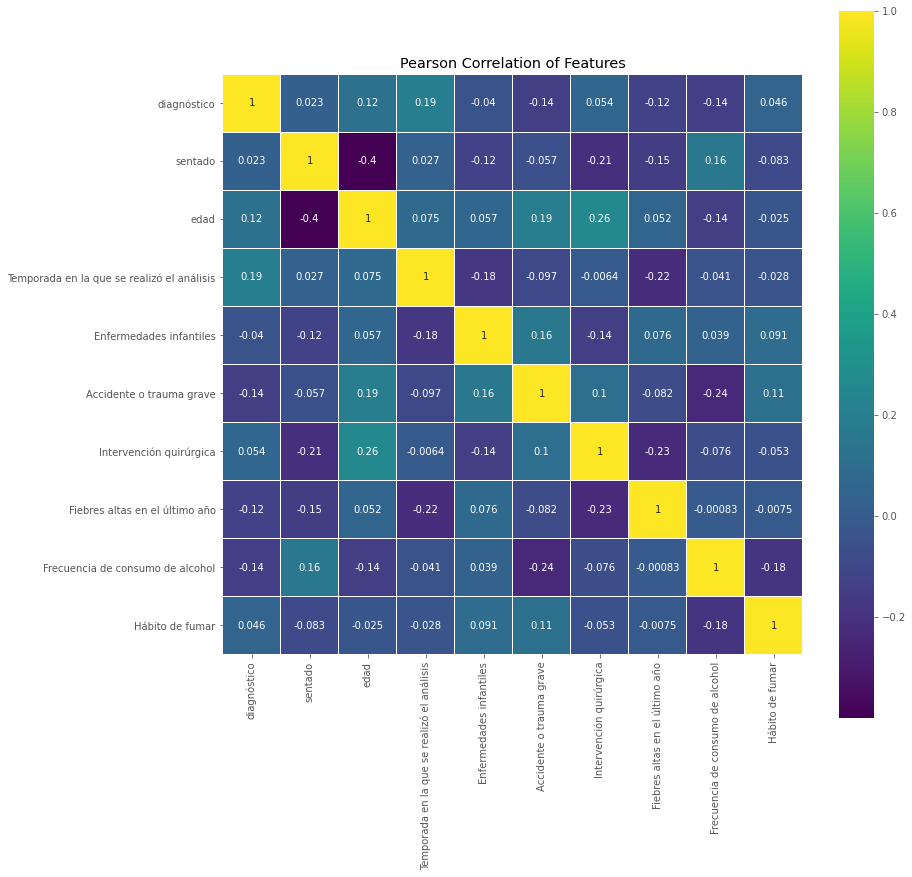

In [ ]:
colormap = plt.cm.viridis
plt.figure(figsize=(13,13))
plt.title('Pearson Correlation of Features')
sb.heatmap(df.astype(float).corr(),
           vmax=1.0,
           cmap=colormap,
           annot=True,
           linewidths=0.1,
           linecolor='white',
           square=True)

Como podemos ver en la gráfica de correlación de Pearson, ninguna de las variables se correlaciona considerablemente con otra, por lo que usaremos todas para crear el árbol ya que todas nos pueden dar información

In [ ]:
cv = KFold(n_splits=10) # Numero deseado de "folds" que haremos
accuracies = list()
max_attributes = len(list(df))
depth_range = range(1, max_attributes + 1)
""" 
En la línea de código cv = KFold(n_splits=10), indicamos que tendremos 90% datos para el entrenamiento y 10% para el test, 
se decidió de esta manera ya que los datos no eran muy grandes y nos parece prudente tener el grueso de los datos en entrenamiento, 
pero sabiendo que el test al ser un dataset pequeño no puede ser muy pequeño.

Para balancear los datos, sabemos que tenemos menos etiquetas de tipo 1=alterado; Por lo tanto, le asignamos 7.33 de peso a la etiqueta 1 para compensar.
El valor sale de dividir la cantidad de diagnostico=0 (son 88) con los diagnostico=1 (son 12).

"""

# Testearemos la profundidad de 1 a cantidad de atributos +1
for depth in depth_range:
    fold_accuracy = []
    tree_model = tree.DecisionTreeClassifier(criterion='entropy',
                                             min_samples_split=8,
                                             min_samples_leaf=2,
                                             max_depth = depth,
                                             class_weight={1:7.33}) # Por defecto todas las clases igual peso
                                                                   # Columna 1 (diagnóstico) con peso de 7.33
    for train_fold, valid_fold in cv.split(df):
        f_train = df.loc[train_fold] 
        f_valid = df.loc[valid_fold] 

        model = tree_model.fit(X = f_train.drop(['diagnóstico'], axis=1), 
                               y = f_train["diagnóstico"]) 
        valid_acc = model.score(X = f_valid.drop(['diagnóstico'], axis=1), 
                                y = f_valid["diagnóstico"]) # calculamos la precision con el segmento de validacion
        fold_accuracy.append(valid_acc)

    avg = sum(fold_accuracy)/len(fold_accuracy)
    accuracies.append(avg)
    
# Mostramos los resultados obtenidos
df1 = pd.DataFrame({"Max Depth": depth_range, "Average Accuracy": accuracies})
df1 = df1[["Max Depth", "Average Accuracy"]]
print(df1.to_string(index=False))

 Max Depth  Average Accuracy
         1              0.47
         2              0.59
         3              0.57
         4              0.64
         5              0.70
         6              0.69
         7              0.70
         8              0.70
         9              0.69
        10              0.69




La mayoría de veces los resultados de la celda anterior nos indican, que con una máxima profundidad de 7 nuestro algoritmo tendrá un mejor performance, aunque 5, 6, 8, 9 y 10 también  se suele obtener un buen accuracy

In [ ]:

min_samples_split_list=[]
min_samples_leaf_list=[]
acc_decision_tree_list=[]

for i in range(5,16):
  for j in range(2,10):
    y_train = df['diagnóstico']
    x_train = df.drop(['diagnóstico'], axis=1).values 

    # Crear Arbol de decision con profundidad = 7
    decision_tree = tree.DecisionTreeClassifier(criterion='entropy',
                                                min_samples_split=i,
                                                min_samples_leaf=j,
                                                max_depth = 7,
                                                class_weight={1:5})
    decision_tree.fit(x_train, y_train)
    acc_decision_tree = round(decision_tree.score(x_train, y_train) * 100, 2)
    min_samples_split_list.append(i)
    min_samples_leaf_list.append(j)
    acc_decision_tree_list.append(acc_decision_tree)

accuracy_para_diferentes_valores = pd.DataFrame(
       {'min_samples_split_list': min_samples_split_list,
        'min_samples_leaf_list': min_samples_leaf_list,
        'acc_decision_tree_list': acc_decision_tree_list
       })
accuracy_para_diferentes_valores.head(10)

,min_samples_split_list,min_samples_leaf_list,acc_decision_tree_list
0,5,2,88.0
1,5,3,81.0
2,5,4,78.0
3,5,5,69.0
4,5,6,72.0
5,5,7,79.0
6,5,8,79.0
7,5,9,79.0
8,6,2,88.0
9,6,3,81.0


para analizar el accuracy con diferentes valores, crearemos varios árboles. Con un rango para la cantidad minima de muestras de un nodo para decidir entre 5 y 15; y un rango para la cantidad minima en las hojas entre 2 y 9. Esto se hizo con dos for anidados.
Todos estos datos los guardaremos en un dataframe para mayor comodidad

In [ ]:
accuracy_para_diferentes_valores.acc_decision_tree_list.max()

88.0

Econtramos el valor máximo, pero sabemos que este valor puede estar repetido en varias combinaciones

In [ ]:
lista_maximos = accuracy_para_diferentes_valores.index[(accuracy_para_diferentes_valores.acc_decision_tree_list== 88.0)]
df_maximos=pd.DataFrame()
cont=0
for i in lista_maximos:  
  df_maximos[cont]=accuracy_para_diferentes_valores.iloc[i]
  cont +=1
df_maximos.T

,min_samples_split_list,min_samples_leaf_list,acc_decision_tree_list
0,5.0,2.0,88.0
1,6.0,2.0,88.0
2,7.0,2.0,88.0
3,8.0,2.0,88.0


En la celda anterior guardamos en una lista los index de los valores máximos y luego creamos un df que nos muestra cuáles serían las mejores opciones para crear el árbol

Mediante estas pruebas  se determinó:



`'min_samples_split'`: cantidad minima de muestras que debe tener un nodo para subdividir, puede ser 8,7,6,5

`'min_samples_leaf'`: cantidad minima que puede tener una hoja final, debe ser 2


Para los otros valores  podemos verificar en el dataframe accuracy_para_diferentes_valores la accuracy siempre será menor



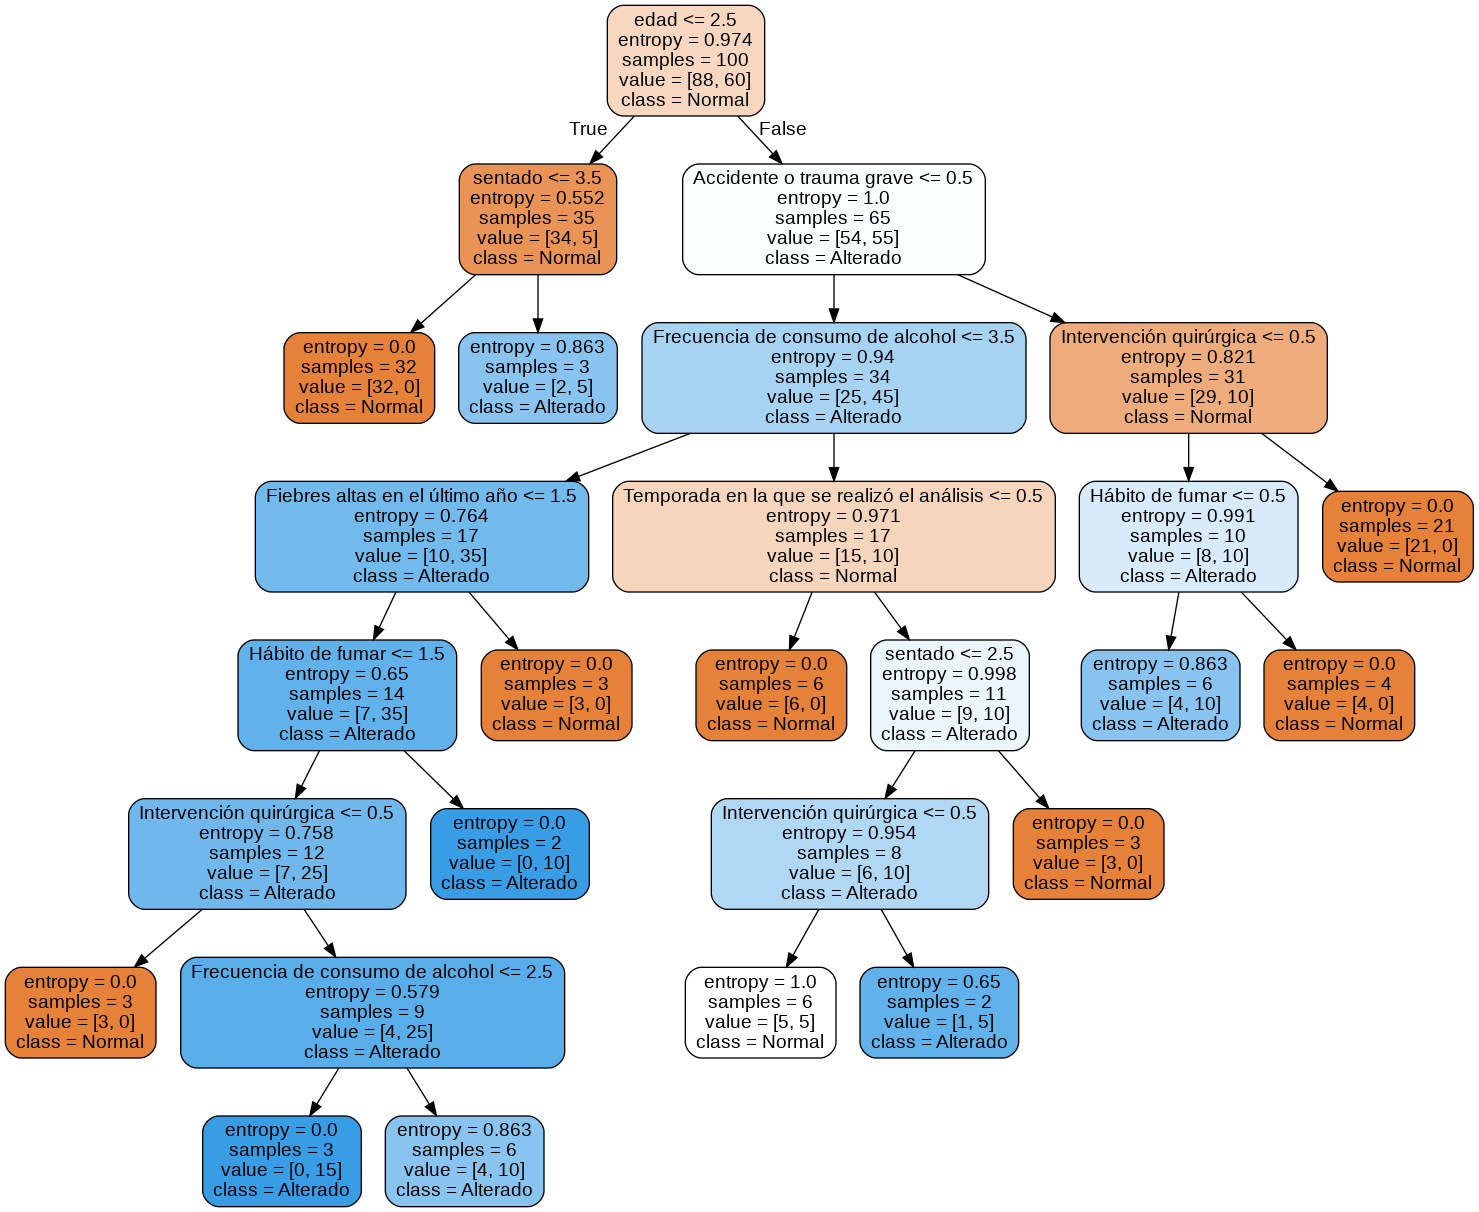

In [ ]:
# Crear arrays de entrenamiento y las etiquetas que indican si llegó a top o no 
y_train = df['diagnóstico']
x_train = df.drop(['diagnóstico'], axis=1).values 

# Crear Arbol de decision con profundidad = 7
decision_tree = tree.DecisionTreeClassifier(criterion='entropy',
                                            min_samples_split=8,
                                            min_samples_leaf=2,
                                            max_depth = 7,
                                            class_weight={1:5})
decision_tree.fit(x_train, y_train)

# exportar el modelo a archivo .dot
with open(r"tree1.dot", 'w') as f:
     f = tree.export_graphviz(decision_tree,
                              out_file=f,
                              max_depth = 7,
                              impurity = True,
                              feature_names = list(df.drop(['diagnóstico'], axis=1)),
                              class_names = ['Normal', 'Alterado'],
                              rounded = True,
                              filled= True )
        
# Convertir el archivo .dot a png para poder visualizarlo
check_call(['dot','-Tpng',r'tree1.dot','-o',r'tree1.png'])
PImage("tree1.png")

In [ ]:
acc_decision_tree = round(decision_tree.score(x_train, y_train) * 100, 2)
print(acc_decision_tree,'%')

88.0 %


In [ ]:
#Predicción Integrante del grupo Santiago Campos 
x_test = pd.DataFrame(columns=('diagnóstico','sentado',	'edad',	'Temporada en la que se realizó el análisis',	'Enfermedades infantiles',
                               'Accidente o trauma grave',	'Intervención quirúrgica',	'Fiebres altas en el último año',
                               'Frecuencia de consumo de alcohol',	'Hábito de fumar'))
x_test.loc[0] = (0,1,1,1,0,0,1,2,3,0)
y_pred = decision_tree.predict(x_test.drop(['diagnóstico'], axis = 1))
print("Prediccion: " + str(y_pred))
y_proba = decision_tree.predict_proba(x_test.drop(['diagnóstico'], axis = 1))
print("Probabilidad de Acierto: " + str(np.round(y_proba[0][y_pred]* 100, 2)) + "%")

Prediccion: [0]
Probabilidad de Acierto: [100.]%


##Bayesian

In [ ]:
import pandas as pd
import csv
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sb
 
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

# librerías Árboles de Decisión
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from IPython.display import Image as PImage
from subprocess import check_call
from PIL import Image, ImageDraw, ImageFont

# librerías Gaussian Naive Bayes
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_selection import SelectKBest
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import make_scorer

In [ ]:
df1=df

In [ ]:
df1.diagnóstico.value_counts()

0    88
1    12
Name: diagnóstico, dtype: int64

In [ ]:
X=df1.drop(['diagnóstico'], axis=1)
y=df1['diagnóstico']
 
best=SelectKBest(k=6)
X_new = best.fit_transform(X, y)
X_new.shape
selected = best.get_support(indices=True)
print(X.columns[selected])

Index(['edad', 'Temporada en la que se realizó el análisis',
       'Accidente o trauma grave', 'Intervención quirúrgica',
       'Fiebres altas en el último año', 'Frecuencia de consumo de alcohol'],
      dtype='object')


In [ ]:
# Split dataset in training and test datasets
X_train, X_test = train_test_split(df1, test_size=0.2, random_state=116) 
y_train =X_train["diagnóstico"]
y_test = X_test["diagnóstico"]
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

80
20
80
20


In [ ]:
used_features =X.columns[selected]

In [ ]:
# Instantiate the classifier
gnb = GaussianNB()
# Train classifier
gnb.fit(
    X_train[used_features].values,
    y_train
)
y_pred = gnb.predict(X_test[used_features])
 
print('Exactitud en el Entrenamiento: {:.2f}'
     .format(gnb.score(X_train[used_features], y_train)))
print('Exactitud en la Validación (test): {:.2f}'
     .format(gnb.score(X_test[used_features], y_test)))

Exactitud en el Entrenamiento: 0.88
Exactitud en la Validación (test): 0.85


In [ ]:
acc_gnb = round(accuracy_score(y_test, y_pred) * 100, 2)
print(acc_gnb,'%')

85.0 %


In [ ]:
import tensorflow as tf
matrix = tf.math.confusion_matrix(y_test, y_pred, num_classes=2, weights=None, dtype=tf.dtypes.int32, name=None)
print(matrix)

tf.Tensor(
[[16  1]
 [ 2  1]], shape=(2, 2), dtype=int32)


In [ ]:
# Cálculo del reporte de clasificación
from sklearn.metrics import classification_report, accuracy_score, f1_score, recall_score, precision_score
print(f'Reporte de clasificación:')
print(classification_report(y_test, y_pred))

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.89      0.94      0.91        17
           1       0.50      0.33      0.40         3

    accuracy                           0.85        20
   macro avg       0.69      0.64      0.66        20
weighted avg       0.83      0.85      0.84        20



In [ ]:
#                 ['edad', 'Temporada en la que se realizó el análisis','Accidente o trauma grave', 'Intervención quirúrgica',
#       'Fiebres altas en el último año', 'Frecuencia de consumo de alcohol']
print(gnb.predict([[1,1,0,1,2,3]]))

[0]


La Predicción Bayesiana dio el resultado esperado. Entonces contrastando éste método con el de árboles de decisión. Se observa que la precisión general de los árboles fue de 88 % y la Bayesiana 85 %, mejor los árboles, y para la predicción puntual del ejemplo dio 100% por lo cual se puede afirmar que hubo mayor confianza con los árboles de decisión.

